# PJM Hourly Energy Consumption Data
## Over 10 years of hourly energy consumption data from PJM in Megawatts

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
#from fbprophet import Prophet
plt.style.use('fivethirtyeight') # For plots
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf
pyo.init_notebook_mode(connected=True)
cf.go_offline()

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Import data
pjme = pd.read_csv('AEP_hourly.csv')
pjme.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [3]:
pjme['Datetime'] = pjme['Datetime'].map(pd.to_datetime)

In [4]:
def get_dom(dt):
    return dt.day

pjme['date'] = pjme['Datetime'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()

pjme['weekday'] = pjme['Datetime'].map(get_weekday)

def get_hour(dt):
    return dt.hour

pjme['hour'] = pjme['Datetime'].map(get_hour)

def get_year(dt):
    return dt.year

pjme['year'] = pjme['Datetime'].map(get_year)

def get_month(dt):
    return dt.month

pjme['month'] = pjme['Datetime'].map(get_month)

def get_dayofyear(dt):
    return dt.dayofyear

pjme['dayofyear'] = pjme['Datetime'].map(get_dayofyear)

def get_weekofyear(dt):
    return dt.weekofyear

pjme['weekofyear'] = pjme['Datetime'].map(get_weekofyear)

pjme.head()

,Datetime,AEP_MW,date,weekday,hour,year,month,dayofyear,weekofyear
0,2004-12-31 01:00:00,13478.0,31,4,1,2004,12,366,53
1,2004-12-31 02:00:00,12865.0,31,4,2,2004,12,366,53
2,2004-12-31 03:00:00,12577.0,31,4,3,2004,12,366,53
3,2004-12-31 04:00:00,12517.0,31,4,4,2004,12,366,53
4,2004-12-31 05:00:00,12670.0,31,4,5,2004,12,366,53


## Pre Data Inspection

In [45]:
pjme.shape

(121273, 9)

In [46]:
pjme.describe()

,AEP_MW,date,weekday,hour,year,month,dayofyear,weekofyear
count,121273.000000,121273.000000,121273.000000,121273.000000,121273.000000,121273.000000,121273.000000,121273.000000
mean,15499.513717,15.723220,2.999513,11.501587,2011.169988,6.500309,182.419005,26.497720
std,2591.399065,8.802246,1.999816,6.921830,4.011177,3.461454,105.840454,15.130003
min,9581.000000,1.000000,0.000000,0.000000,2004.000000,1.000000,1.000000,1.000000
25%,13630.000000,8.000000,1.000000,6.000000,2008.000000,4.000000,91.000000,13.000000
50%,15310.000000,16.000000,3.000000,12.000000,2011.000000,6.000000,181.000000,26.000000
75%,17200.000000,23.000000,5.000000,18.000000,2015.000000,10.000000,276.000000,40.000000
max,25695.000000,31.000000,6.000000,23.000000,2018.000000,12.000000,366.000000,53.000000


In [47]:
pjme.isnull().sum()

Datetime      0
AEP_MW        0
date          0
weekday       0
hour          0
year          0
month         0
dayofyear     0
weekofyear    0
dtype: int64

# Data Visualization

### Plotting the Features to see trends using  Seaborn

# YearlyTrend

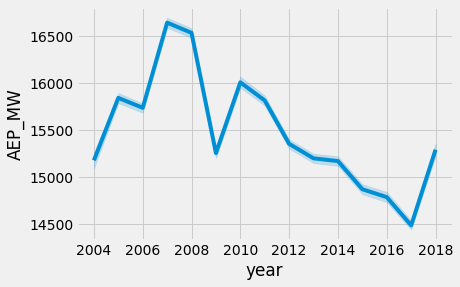

In [48]:
sns.lineplot(x = 'year', y = 'AEP_MW',markers=True, dashes=False, data=pjme)

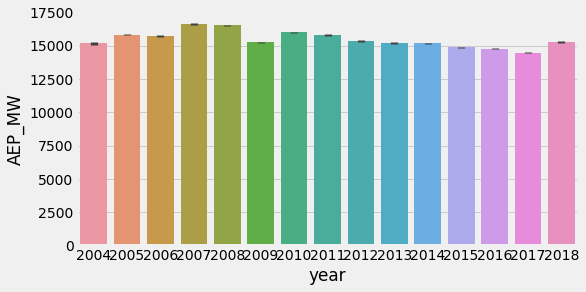

In [49]:
figure(figsize=(8, 4))
sns.barplot(x = 'year', y = 'AEP_MW', data=pjme)

Continuous decrease in energy consumption from 2007 to 2017

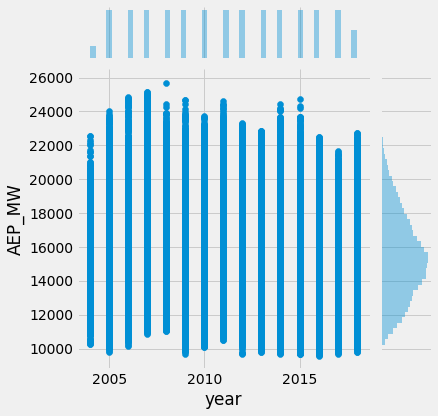

In [50]:
sns.jointplot(x = 'year', y = 'AEP_MW', data=pjme)

# Monthly Trend

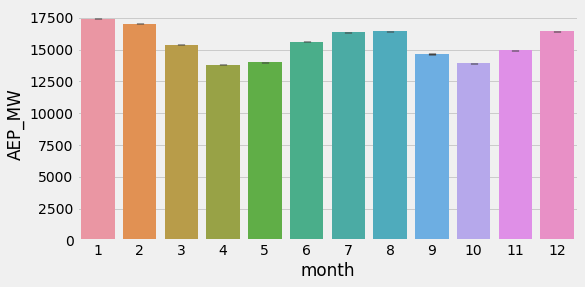

In [51]:
figure(figsize=(8, 4))
sns.barplot(x = 'month', y = 'AEP_MW', data=pjme)

January shows the highest usage in the yearly trend
April and Octobar shows the least usage month-wise

# Weekday-wise Trend

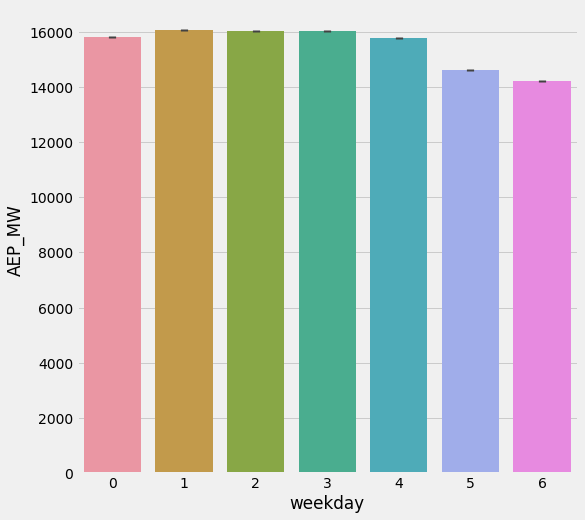

In [52]:
figure(figsize=(8, 8))
sns.barplot(x = 'weekday', y = 'AEP_MW', data=pjme)

Weekdays shows regular high usage in power consumption. Power consumption shows gradual decrease during weekends

# Date-wise Trend

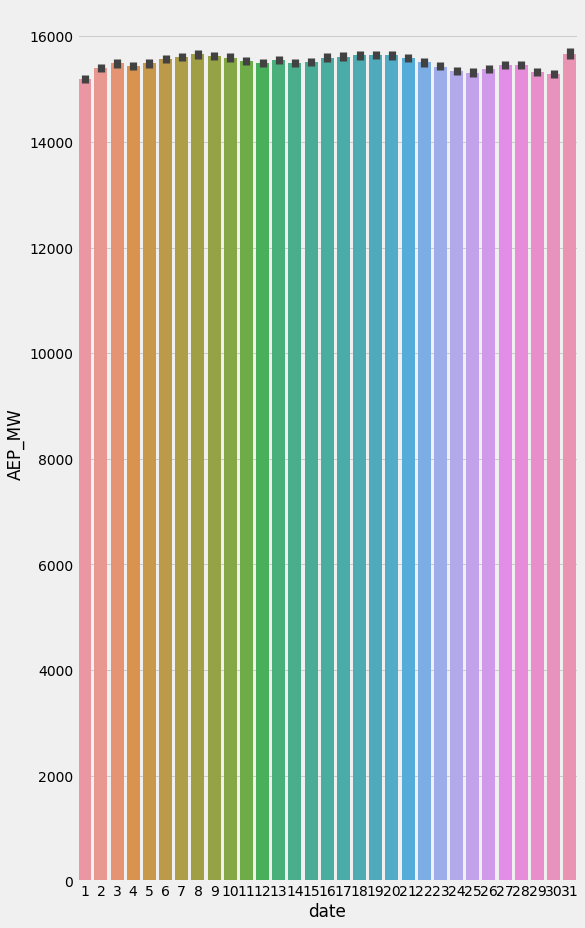

In [53]:
figure(figsize=(8, 15))
sns.barplot(x = 'date', y = 'AEP_MW', data=pjme)

Regular increase and decrease in power consumption trend. Last day on the month shows exceptional higher power consumption.

# Hour-wise trend

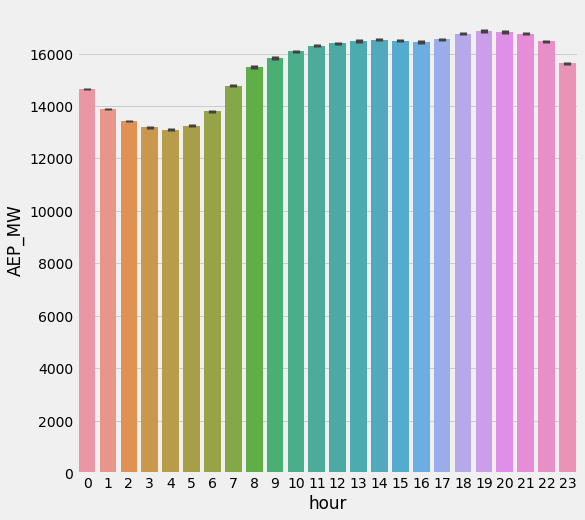

In [54]:
figure(figsize=(8, 8))
sns.barplot(x = 'hour', y = 'AEP_MW', data=pjme)

Trend clearly shows decrease in Power comsumption as we go into mid-night. Power consumption gradually increases towards the day. Highest PC can seen from 6 PM to 9 PM.

#### We have now completely analyzed and visualized the trends of energy consumption in every aspect.